# Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#setting up default browser " chrome"
browser =Browser('chrome')

# step 1: visit the Website

In [4]:
#url to vistit
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
#visiting the marss website
html = browser.visit(url)

#saving the html 
html =browser.html


# step 2:Scrape the table

In [5]:
# creating BeautifulSoup object:
soup=BeautifulSoup(html,'html.parser')

In [6]:
df =pd.read_html(url)
df


[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [7]:
len(df)

1

In [8]:
df[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
df[0].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


# step 3: Store the Data

In [10]:
df[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
# converting to date time formate:
df[0]['terrestrial_date']=pd.to_datetime(df[0]['terrestrial_date'])
df[0]['terrestrial_date']

0      2012-08-16
1      2012-08-17
2      2012-08-18
3      2012-08-19
4      2012-08-20
          ...    
1862   2018-02-23
1863   2018-02-24
1864   2018-02-25
1865   2018-02-26
1866   2018-02-27
Name: terrestrial_date, Length: 1867, dtype: datetime64[ns]

# step 4: Prepare the Data for analysis

In [12]:
clean_df =df[0].copy()
clean_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [13]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


# Step 5:Analyze the Data

In [14]:
#1.how many month exist on Mars?
mars_count = len(clean_df['month'].unique())
print (f'there are {mars_count} months in mars.')

there are 12 months in mars.


In [15]:
#2 how many martain (and not earth) days worth exist in the scraped dataset?
martian_days = len(clean_df['sol'])
print(f'there are {martian_days} worth of data.')

there are 1867 worth of data.


In [16]:
# 3. What is the average minimum temperature by month?
min_temp =clean_df.groupby(['month'])['min_temp'].mean()
min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [17]:
# Plot the average minimum temperature by month
# we need to filter the duplicate out.
non_duplicated_month = clean_df['month'].drop_duplicates()
print(non_duplicated_month )

0       6
40      7
90      8
137     9
179    10
203    11
248    12
304     1
357     2
405     3
464     4
529     5
Name: month, dtype: int64


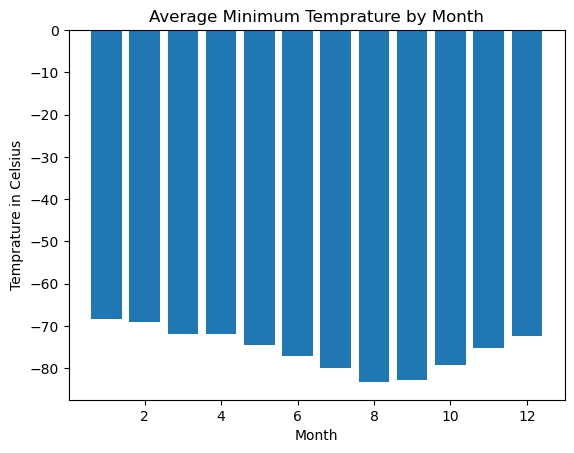

In [18]:
#month = [1,2,3,4,5,6,7,8,9,10,11,12]#'1','2','3','4','5','6','7','8','9','10','11','12'
plt.bar(non_duplicated_month ,min_temp)
#plt.xticks(month)
plt.xlabel('Month')
plt.ylabel("Temprature in Celsius")
plt.title("Average Minimum Temprature by Month")
plt.show()
          

In [19]:
sorted_asc = min_temp.sort_values(ascending=True)
sorted_asc

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

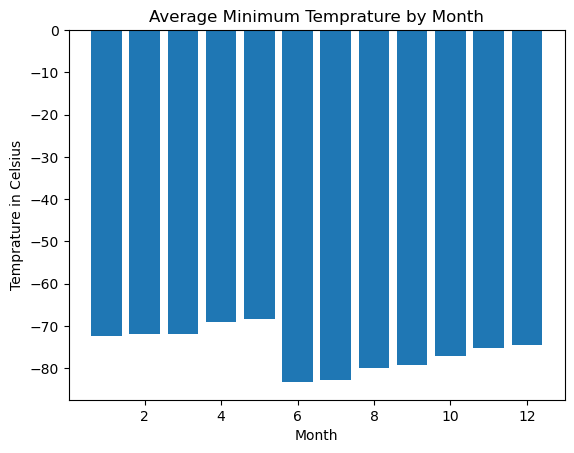

In [20]:
plt.bar(non_duplicated_month ,sorted_asc)
#plt.xticks(month)
plt.xlabel('Month')
plt.ylabel("Temprature in Celsius")
plt.title("Average Minimum Temprature by Month")
plt.show()

In [21]:
# 4. What is the average pressure by month?
avrg_pressure = clean_df.groupby(clean_df['month'])['pressure'].mean()
avrg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

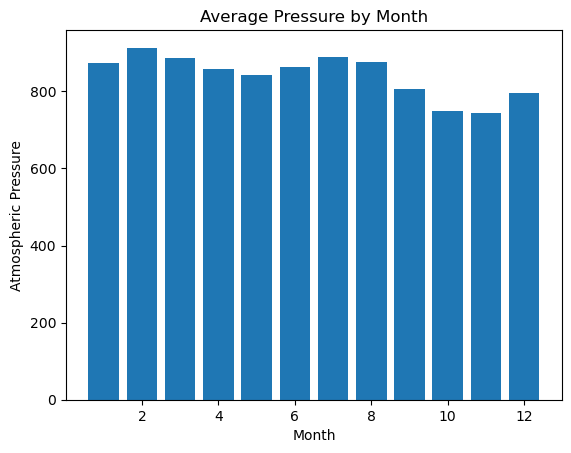

In [22]:
# Plot the average pressure by month
plt.bar(non_duplicated_month ,avrg_pressure)
#plt.xticks(month)
plt.xlabel('Month')
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

In [23]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avrg_pressure_asc =avrg_pressure.sort_values(ascending=True)

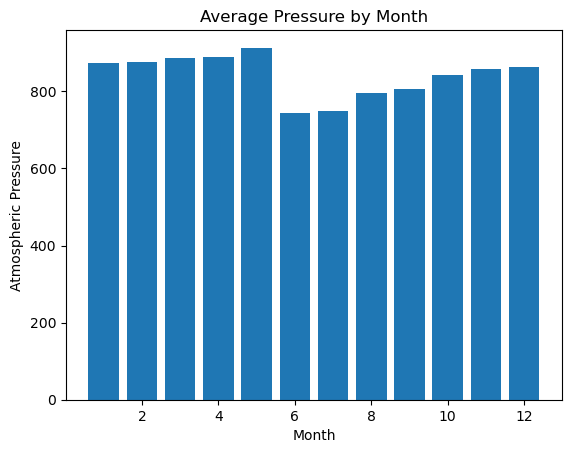

In [24]:
plt.bar(non_duplicated_month ,avrg_pressure_asc)
#plt.xticks(month)
plt.xlabel('Month')
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

In [25]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
ter_min_temp = clean_df.groupby(clean_df['terrestrial_date'])['min_temp'].min()
ter_min_temp

terrestrial_date
2012-08-16   -75.0
2012-08-17   -76.0
2012-08-18   -76.0
2012-08-19   -74.0
2012-08-20   -74.0
              ... 
2018-02-23   -78.0
2018-02-24   -77.0
2018-02-25   -76.0
2018-02-26   -77.0
2018-02-27   -77.0
Name: min_temp, Length: 1867, dtype: float64

In [26]:
terristrial_count = clean_df.groupby(['min_temp'])['terrestrial_date'].count()
terristrial_count

min_temp
-90.0      1
-89.0      2
-88.0     15
-87.0     30
-86.0     49
-85.0     71
-84.0     63
-83.0     30
-82.0     57
-81.0     67
-80.0    118
-79.0    129
-78.0    114
-77.0    138
-76.0    133
-75.0    111
-74.0    112
-73.0    111
-72.0    102
-71.0    117
-70.0     79
-69.0     59
-68.0     49
-67.0     34
-66.0     31
-65.0     32
-64.0      9
-63.0      3
-62.0      1
Name: terrestrial_date, dtype: int64

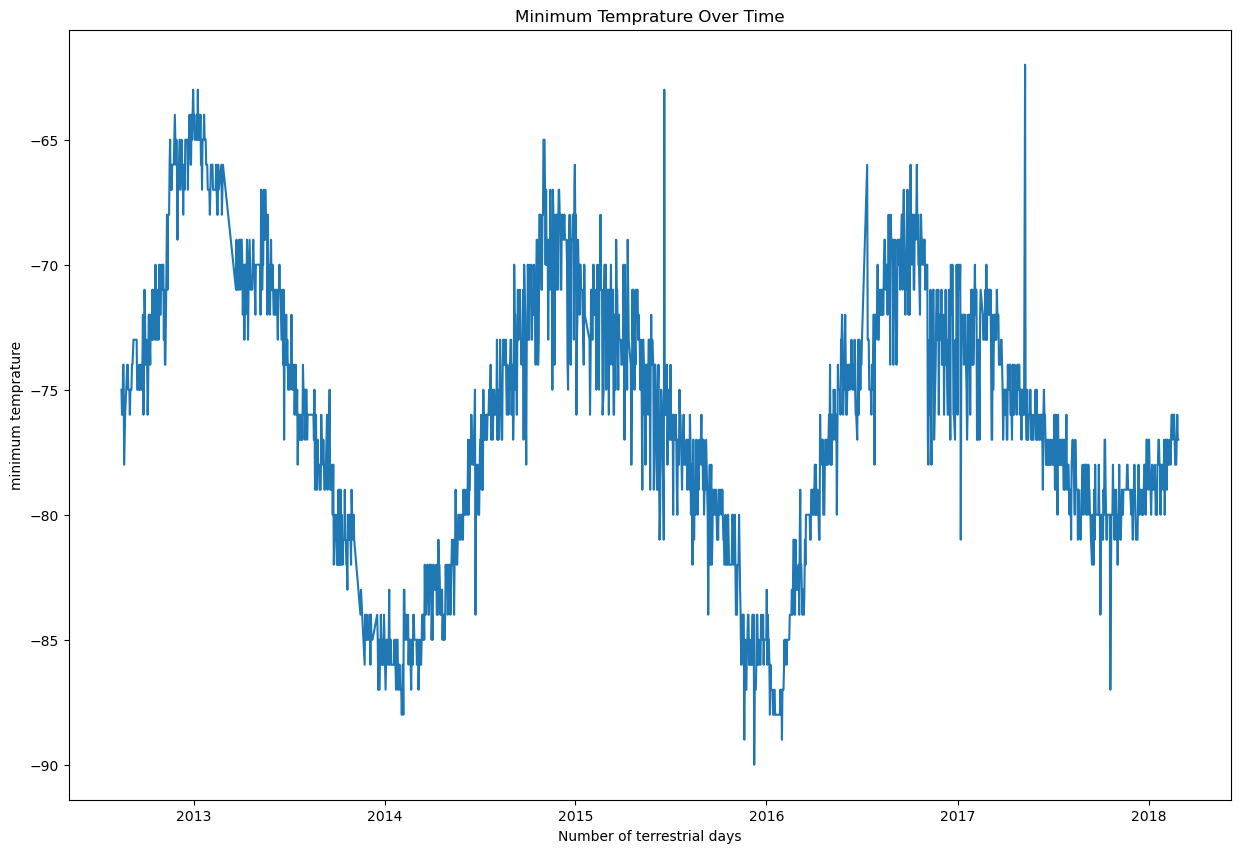

In [27]:

fig =plt.figure(figsize = (15,10))
plt.plot(clean_df['terrestrial_date'],ter_min_temp)
#plt.xticks(labels)
plt.title("Minimum Temprature Over Time")
plt.xlabel('Number of terrestrial days')
plt.ylabel('minimum temprature')
plt.show()

# Minimum Temprature is   -83.307292 which is very cold.and the highest temprature in mars is -68.382979
# Atmospheric pressure ; there is high pressure in month of 9 average of  913.305970
# there are 12 month exist in mars


In [28]:
csv_df =clean_df.to_csv('mars_weather.csv',index=False)


In [29]:
browser.quit()